Importing the Dependencies

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [22]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [23]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [24]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

Separating the features and target

In [25]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [26]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [27]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Model Training

Logistic Regression

In [30]:
model = LogisticRegression(max_iter=10000)

In [31]:
# training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Model Evaluation

Accuracy Score

In [32]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [33]:
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9692307692307692


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [35]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9298245614035088


**CONFUSION MATRIX**

Confusion Matrix:
[[41  4]
 [ 4 65]]


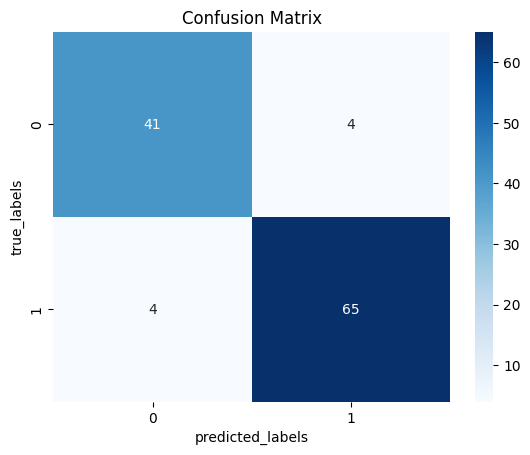

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example true labels and predicted labels (replace these with your actual data)
true_labels = Y_test
predicted_labels = X_test_prediction

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('predicted_labels')
plt.ylabel('true_labels')
plt.show()

In [37]:
import joblib
model_filename="model1.pkl"
joblib.dump(model,model_filename)
from google.colab import files
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
max_value = data_frame['mean radius'].max()

print("Maximum value in the 'Value' column:", max_value)


Maximum value in the 'Value' column: 28.11


In [39]:
min_value = data_frame['mean radius'].min()

print("Maximum value in the 'Value' column:", min_value)


Maximum value in the 'Value' column: 6.981


In [40]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')